# 集成学习

## Random Forest（随机森林）

通过构建多个决策树并集成它们来进行分类或回归的。

* 自助采样（Bootstrap Sampling）：从原始数据集中有放回地随机抽取样本，构成子集。自助采样可以使用以下公式表示：
$ D’ = (x_i, y_i) \quad \text{其中} \quad x_i, y_i \in D $

* 特征子集选择：在每个决策树的节点划分时，随机选择一部分特征作为候选划分特征。

* 决策树构建：决策树的构建过程包括选择最佳的划分特征和划分点。常用的划分准则包括基尼指数（Gini Index）和信息增益（Information Gain）等。

* 集成投票：在分类任务中，随机森林通过投票表决的方式来确定最终的分类结果。在回归任务中，随机森林通过对每棵树的预测结果取平均值来得到最终的回归输出。

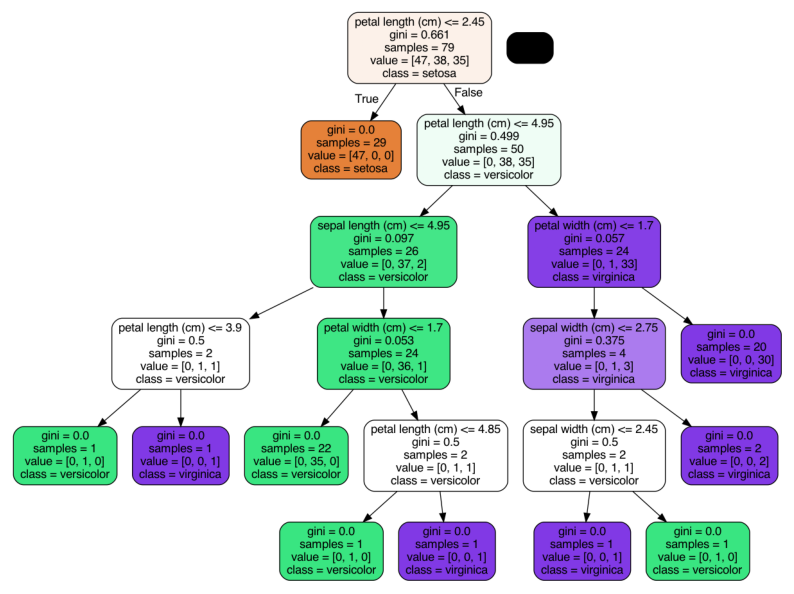

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt

# 加载数据
data = load_iris()
X = data.data
y = data.target

# 划分训练集和测试集
X_train, X_test, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林分类器
model = RandomForestClassifier()

# 训练模型
model.fit(X_train, y_train)

# 可视化决策树（第一棵树）
estimator = model.estimators_[0]
dot_data = export_graphviz(estimator, out_file=None, feature_names=data.feature_names,
                           class_names=data.target_names, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

# 保存为图像文件
graph.write_png('random_forest_tree.png')

# 使用matplotlib显示图像
plt.figure(figsize=(10, 10))
plt.imshow(plt.imread('random_forest_tree.png'))
plt.axis('off')
plt.show()


## GBDT（Gradient Boosting Decision Trees）
一种梯度提升决策树算法，通过连续训练多个决策树来提高预测性能。每棵树都是基于前一棵树的残差进行训练。

GBDT的基本公式可以分为两个部分：损失函数（Loss Function）和决策树更新规则。

* 损失函数（Loss Function）：
在GBDT中，常用的损失函数是平方误差损失函数（Squared Error Loss Function），定义为实际值与预测值之间的平方差。对于回归问题，损失函数的计算公式如下：

$ L(y_i, \hat{y}_i) = (y_i - \hat{y}_i)^2 $

其中，$ y_i $ 是实际值，$ \hat{y}_i $ 是当前模型的预测值。

对于分类问题，常用的损失函数有交叉熵损失函数（Cross Entropy Loss Function）等。具体的损失函数选择取决于任务的特性和需求。

决策树更新规则：
GBDT通过迭代地训练多个决策树，并使每棵树拟合残差来逐步减少损失。在每次迭代中，通过梯度下降的方式更新决策树的拟合结果。决策树的更新规则可以表示为：

$ Tree_m = Tree_{m-1} + \eta \cdot learning_{rate} \cdot Residual $

其中，$Tree_m$ 表示第 $m$ 棵决策树，$Tree_{m-1}$ 表示第 $m-1$ 棵决策树的组合结果，$Residual$ 表示当前模型的预测残差。

$\eta$ 是学习率（learning rate），用于限制每棵树的贡献，防止过拟合。学习率越小，模型的更新幅度越小，对训练数据的拟合程度相对较低，但能提高泛化能力。

以上是GBDT中的基本公式，损失函数和决策树更新规则是GBDT算法的核心部分。具体的实现可能会有一些变化，例如在XGBoost和LightGBM中，还引入了正则化项、特征子采样等策略来进一步优化模型性能。

## XGBoost（eXtreme Gradient Boosting）
一种梯度提升决策树算法，结合了梯度提升和正则化技术，具有较高的准确性和泛化能力。XGBoost的原理涉及多个细节。以下是一些关键：

* 损失函数（Loss Function）：
在XGBoost中，常用的损失函数包括平方损失函数（Squared Loss），对数损失函数（Logistic Loss）等。以平方损失函数为例，其计算公式如下：

$ \mathcal{L}(\hat{y}, y) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $

其中，$ \mathcal{L}(\hat{y} $, $ y $ 表示预测值 $ \hat{y} $ 与实际值 $ y $ 之间的平方误差，$ n $ 表示样本数量，$ y_i )$和 $ \hat{y}_i $ 分别表示第 $ i $ 个样本的实际值和预测值。

* 梯度提升（Gradient Boosting）：

XGBoost使用梯度提升算法来迭代地构建多个弱学习器并加权组合。在每次迭代中，通过计算损失函数的负梯度来拟合当前模型的残差。具体而言，对于平方损失函数，残差的计算公式如下：

$ r_{im} = - \frac{\partial \mathcal{L}(\hat{y}, y)}{\partial \hat{y}} $

其中，$ r_{im} $ 表示第 $ m $ 次迭代中的残差，$ \hat{y} $ 是当前模型对训练样本的预测值。

* 决策树模型：

XGBoost采用决策树作为基础学习器。在构建决策树时，通过拟合当前模型的残差来更新每个叶子节点的输出值。更新规则如下：

$ \text{Output}{j} = \sum{i \in I_j} w_i $

其中，$ \text{Output}_{j} $ 表示第 $ j $ 个叶子节点的输出值，$ I_j $ 是属于叶子节点 $ j $ 的样本索引集合，$ w_i $ 表示样本 $ i $ 的权重。

In [6]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 生成分类数据集
X, y = make_classification(n_samples=100, n_features=4, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建GBDT分类器
model = GradientBoostingClassifier()

# 训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9



[1] 信息熵 https://baike.baidu.com/item/%E4%BF%A1%E6%81%AF%E7%86%B5/7302318